## Desafios Aula 2
### Preparando os dados

In [5]:
import pandas as pd
fonte = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(fonte, compression = 'zip')
dados.columns = [coluna.replace('-', '') for coluna in dados.columns]
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


###Desafio 01: Ordenar o gráfico countplot


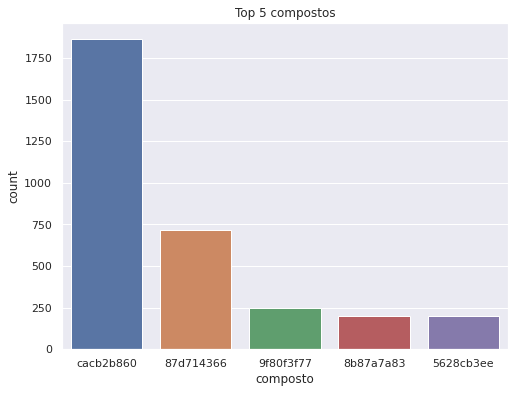

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

cod_compostos = dados['composto'].value_counts().index[0:5]
data = dados.query('composto in @cod_compostos')

plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=data, order=cod_compostos)
ax.set_title('Top 5 compostos')
plt.show()

###Desafio 02: Melhorar a visualização alterando tamanho da fonte...


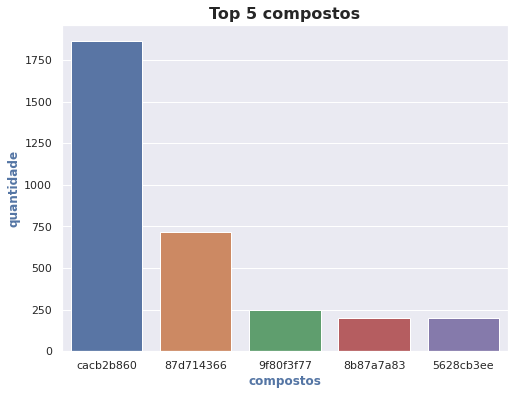

In [28]:
cod_compostos = dados['composto'].value_counts().index[0:5]

data = dados.query('composto in @cod_compostos')

plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=data, order=cod_compostos)
ax.set_title('Top 5 compostos', fontsize=16, fontweight='bold')
ax.set_ylabel('quantidade', fontweight='bold', color='#5475a4')
ax.set_xlabel('compostos', fontweight='bold',  color='#5475a4')
plt.show()

###Desafio 03: Plotar os histogramas com seaborn


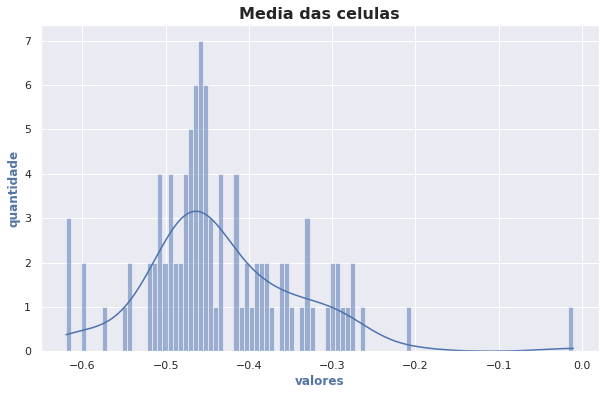

In [60]:
#data = dados.query('composto in @cod_compostos')
data = dados.loc[:, 'c0':'c99'].describe().T['mean']
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, kde=True, bins=100)
ax.set_title('Media das celulas', fontsize=16, fontweight='bold')
ax.set_ylabel('quantidade', fontweight='bold', color='#5475a4')
ax.set_xlabel('valores', fontweight='bold',  color='#5475a4')
 
plt.show()

 ###Desafio 04: Estudar sobre as estatíticas retornadas no .describe()



In [62]:
data = dados.loc[:, 'c0':'c99'].describe()

 data

A função describe do pandas retorna para o usuário diversas medidas estatísticas que são muito úteis para o entendimento da distribuição das variáveis de um dataframe, quando se trata de valores numéricos essa função nos retorna o números de elementos como 'count', medidas de tendência central como a média(mean) e a mediana(50%) que nos fornece informações sobre a distribuição, e principamente analisadas juntas podem dizer muito sobre a variável, já que um distribuição normal por exemplo possui essas duas medidas próximas e partir da diferença entre elas conseguimos extrair informações sobre a variável.
Além disso essa função nos fornece medidas de dispersão como o desvio padrão(std), a principal medida utilizada para medir a dispersão de uma variável, quanto maior esse valor mais variados estão os valores dentro da série.



###Desafio 05: Refletir sobre a manipulação do tamanho das visualizações. 


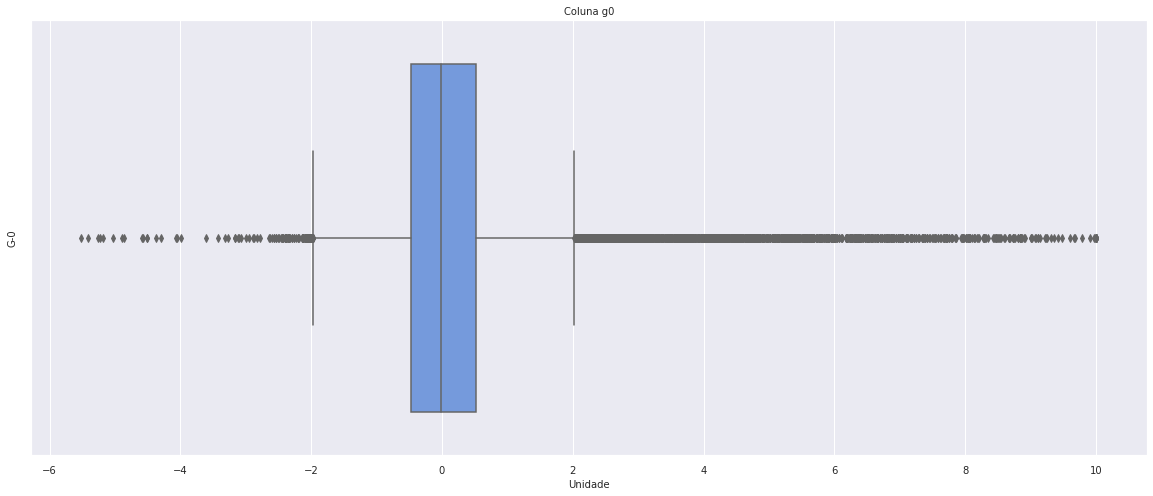

In [66]:
plt.figure(figsize=(20, 8))

sns.boxplot(x='g0', data=dados, color='cornflowerblue')
 
plt.title('Coluna g0', fontsize=10)
plt.ylabel('G-0', fontsize=10)
plt.xlabel('Unidade', fontsize=10)
plt.xticks( fontsize=10)
plt.yticks(fontsize=10)
    
 
plt.show()

###Desafio 06: Fazer outras análises com o boxplot e até com o histograma. 


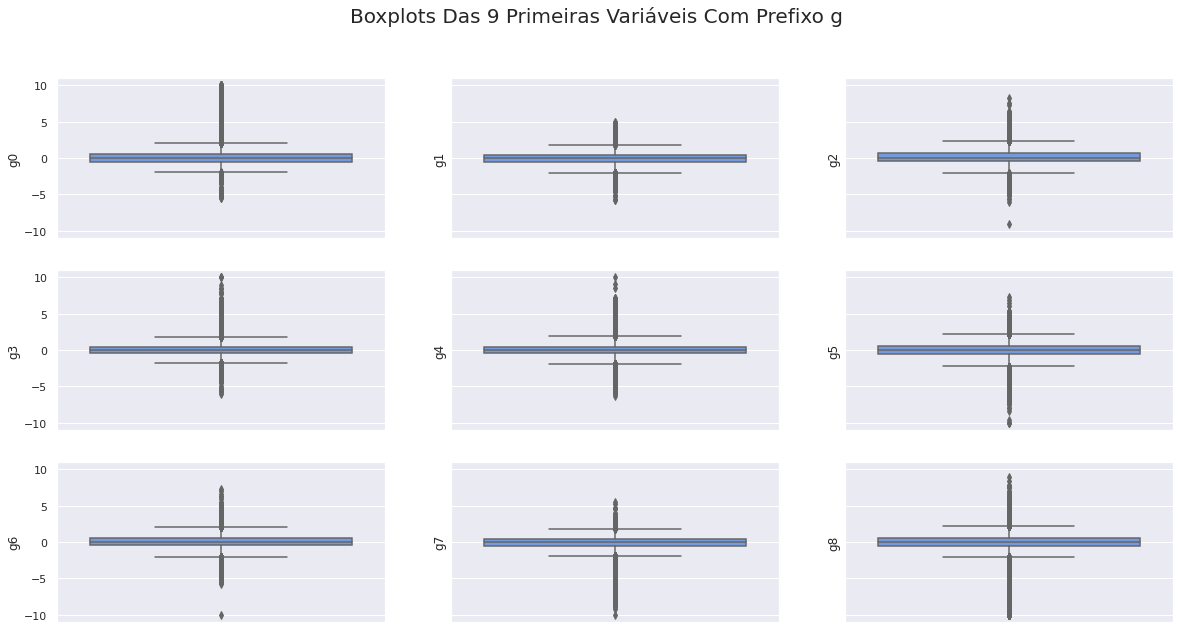

In [67]:
#Criando figura e eixos
fig, ax = plt.subplots(3,3,figsize=(20,10), sharex=True, sharey=True) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.boxplot(y='g0', data=dados, ax=ax[0,0], color='cornflowerblue')
sns.boxplot(y='g1', data=dados, ax=ax[0,1], color='cornflowerblue')
sns.boxplot(y='g2', data=dados, ax=ax[0,2], color='cornflowerblue')
sns.boxplot(y='g3', data=dados, ax=ax[1,0], color='cornflowerblue')
sns.boxplot(y='g4', data=dados, ax=ax[1,1], color='cornflowerblue')
sns.boxplot(y='g5', data=dados, ax=ax[1,2], color='cornflowerblue')
sns.boxplot(y='g6', data=dados, ax=ax[2,0], color='cornflowerblue')
sns.boxplot(y='g7', data=dados, ax=ax[2,1], color='cornflowerblue')
sns.boxplot(y='g8', data=dados, ax=ax[2,2], color='cornflowerblue')

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Boxplots Das 9 Primeiras Variáveis Com Prefixo g', fontsize=20)
    
#Mostrando o gráfico
plt.show()

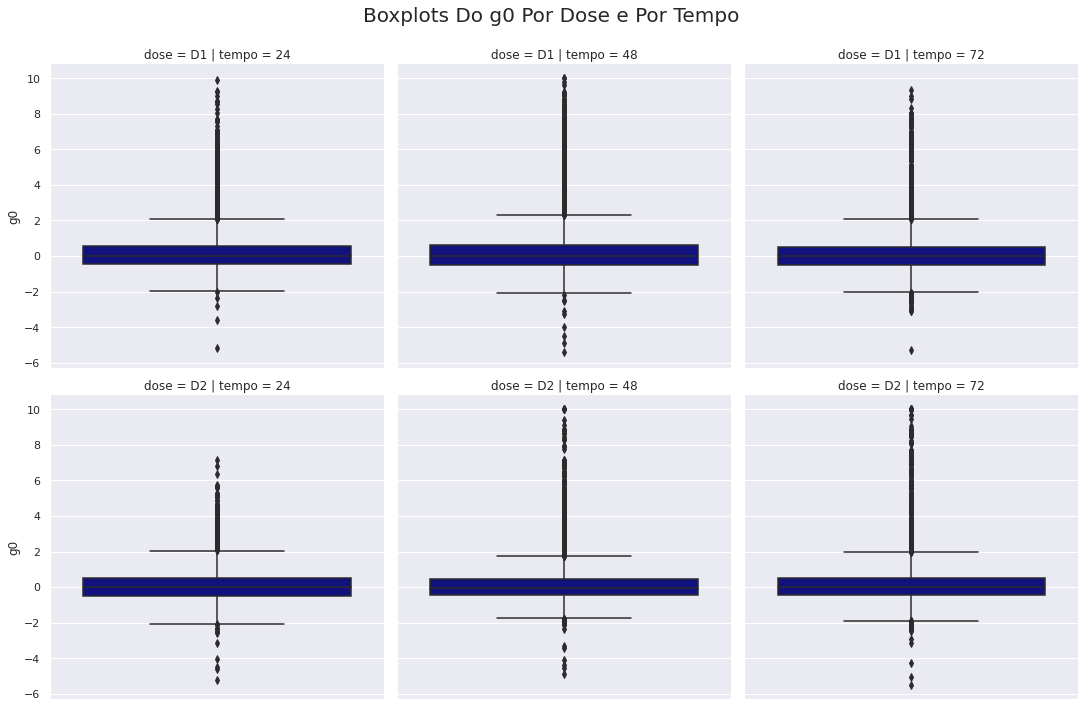

In [68]:
#Setando a cor
sns.set_palette(sns.color_palette("gnuplot2"))

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
cp = sns.catplot(y='g0', data=dados, kind='box', col='tempo', row='dose')

#Plotando o título
cp.fig.subplots_adjust(top=0.9) 
cp.fig.suptitle('Boxplots Do g0 Por Dose e Por Tempo', fontsize=20)
    
#Mostrando o gráfico
plt.show()

In [69]:
data_legend = dados.loc[:, ['tratamento', 'g0']]
data_legend['tratamento'] = data_legend['tratamento'].str.replace('com_droga', 'Com Composto')
data_legend['tratamento'] =  data_legend['tratamento'].str.replace('com_controle', 'Com Controle')
data_legend

,tratamento,g0
0,Com Composto,1.0620
1,Com Composto,0.0743
2,Com Composto,0.6280
3,Com Composto,-0.5138
4,Com Composto,-0.3254
...,...,...
23809,Com Composto,0.1394
23810,Com Composto,-1.3260
23811,Com Controle,0.3942
23812,Com Composto,0.6660


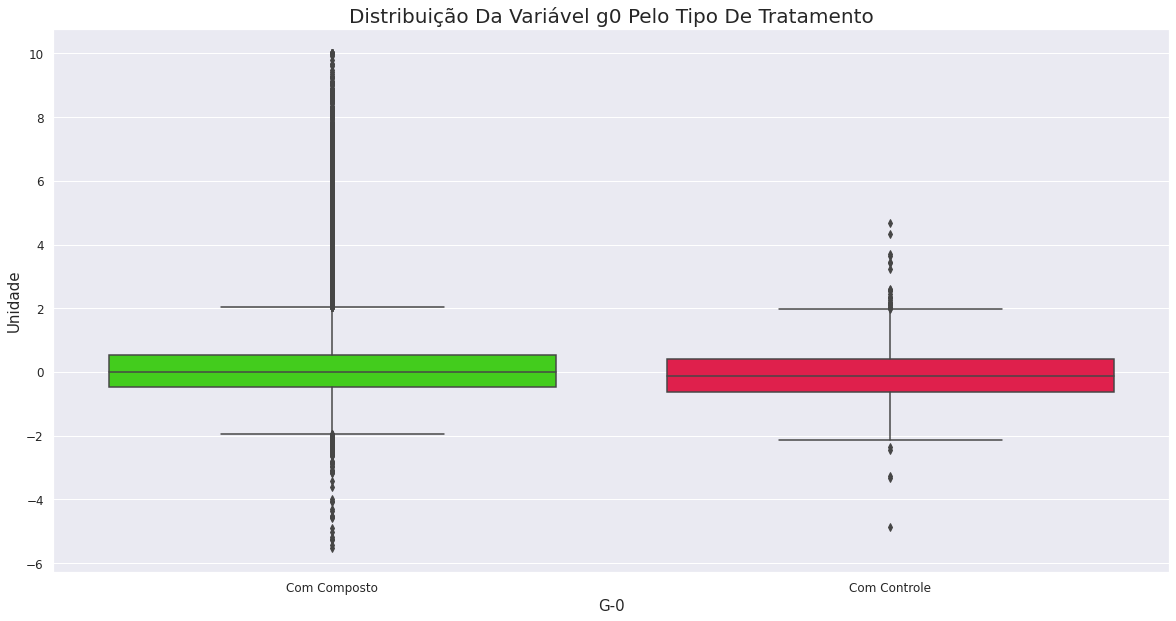

In [70]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(20,10)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#criando uma palheta de 2 cores
sns.set_palette(sns.color_palette('prism', 2))

#Criando o gráfico 
sns.boxplot(x='tratamento', y='g0', data=data_legend, ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Distribuição Da Variável g0 Pelo Tipo De Tratamento', fontsize=20)
plt.ylabel('Unidade', fontsize=15)
plt.xlabel('G-0', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
    
#Mostrando o gráfico
plt.show()

###Desafio 07: Resumo do que você aprendeu com os dados

Nesta aula foram utilizadas funções de visualização de dados através da biblioteca *seabourn* e os tipos boxplot, histplot, além de alteração dos atributos dos eixos y e x dos histogramas como title, label e color.